## Kaggle House Price Competition

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [86]:
# Scan for top correlated variables
train_data.corr().SalePrice.sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [91]:
# try building a model with top 2 variables


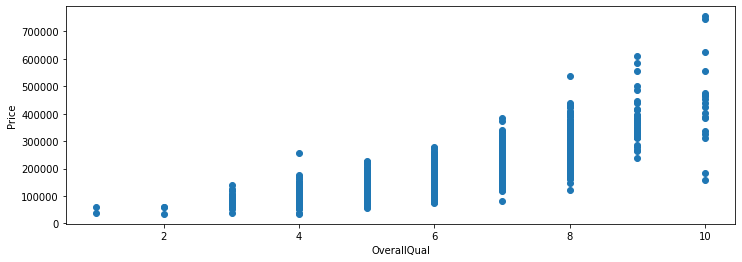

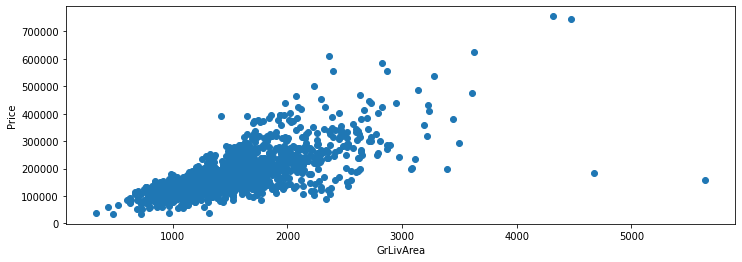

In [92]:
plt.figure(figsize=(12,4))
plt.scatter(train_data.OverallQual,train_data.SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12,4))
plt.scatter(train_data.GrLivArea,train_data.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('Price')
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression

X_train = train_data.OverallQual.values.reshape(-1,1)
y_train = train_data.SalePrice

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

t = train_data.copy(deep=True)
t['pred'] = y_pred
t['RMSE'] = abs( np.log(t.pred) - np.log(t.SalePrice) )
t=t.fillna(0)
print(f'RMSE is {sum(t.RMSE)/len(t.RMSE)}')

RMSE is 0.19283709829251688


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [119]:
from sklearn.linear_model import LinearRegression

X_train = train_data.GrLivArea.values.reshape(-1,1)
y_train = train_data.SalePrice

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

t = train_data.copy(deep=True)
t['pred'] = y_pred
t['RMSE'] = abs( np.log(t.pred) - np.log(t.SalePrice) )
t=t.fillna(0)
print(f'RMSE is {sum(t.RMSE)/len(t.RMSE)}')

RMSE is 0.20442523370888252


In [126]:
# 2 factor model

from sklearn.linear_model import LinearRegression

X_train = train_data[['OverallQual','GrLivArea']]
y_train = train_data.SalePrice

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

t = train_data.copy(deep=True)
t['pred'] = y_pred
t['RMSE'] = abs( np.log(t.pred) - np.log(t.SalePrice) )
t=t.fillna(0)
print(f'RMSE is {sum(t.RMSE)/len(t.RMSE)}')

RMSE is 0.16684709525582098


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


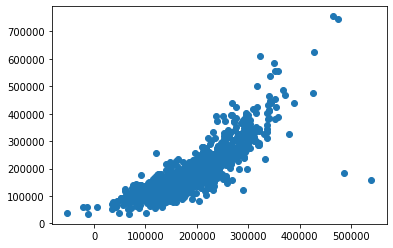

In [135]:
plt.scatter(t.pred,t.SalePrice)
plt.show()

In [130]:
submission = test_data.copy(deep=True)
X_test = test_data[['OverallQual','GrLivArea']]
submission['SalePrice'] = lr.predict(X_test)
submission = submission[['Id','SalePrice']]
submission.to_csv('submission.csv',index=False)